In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, bartlett
import statsmodels.api as sm
%matplotlib inline

In [3]:
# Using the  Wine Quality Dataset, test the claim that Wines with a higher quality rating have 
# a higher median alcohol content than wines with a lower quality rating.

In [4]:
# Null Hypothesis H0: The median alcohol content of wines with higher quality ratings is less than or equal to the median alcohol content of wines with lower quality ratings.
# Alternative Hypothesis H1: The median alcohol content of wines with higher quality ratings is greater than the median alcohol content of wines with lower quality ratings. 

In [25]:
df = pd.read_csv('winequality-red.csv', delimiter =';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
dfw = pd.read_csv('winequality-white.csv', delimiter =';')
dfw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# We will use the wine quality for Red wine to do the test

In [8]:
# Create two independent samples based on wine quality rating
high_quality = df[df['quality'] >= df.quality.median()][["quality", "alcohol"]]
high_quality


,quality,alcohol
3,6,9.8
7,7,10.0
8,7,9.5
16,7,10.5
19,6,9.2
...,...,...
1592,6,11.0
1593,6,9.5
1595,6,11.2
1596,6,11.0


In [9]:
low_quality = df[df['quality'] < df.quality.median()][["quality", "alcohol"]]
low_quality

,quality,alcohol
0,5,9.4
1,5,9.8
2,5,9.8
4,5,9.4
5,5,9.4
...,...,...
1582,5,11.9
1583,5,9.8
1589,5,9.2
1594,5,10.5


# Bartlett's Test with Scipy

In [10]:
# import bartletts test 
from scipy.stats import bartlett

# subsetting the data 
high_quality_len = high_quality["alcohol"] 
low_quality_len = low_quality["alcohol"]

# bartlett's test 
stat, p = bartlett(high_quality_len, low_quality_len)

# display the results 
print(stat, p)

108.97241772227592 1.6455993254214175e-25


In [11]:
#At significance level of 0.05, the p-value is less than 0.05,
#therefore, we reject the null hypothesis and conclude that the two groups don't have an equal variances.

In [12]:
!pip install pingouin 

In [13]:

import pingouin as pg

# bartlett's test with pingouin
pg.homoscedasticity(df, dv="alcohol",group = "quality", method="bartlett")

,T,pval,equal_var
bartlett,85.742952,5.258666e-17,False


# Levene's Test

In [14]:
# import levene test 
from scipy.stats import levene

# levene's test 
stat, p = levene(high_quality["alcohol"], low_quality["alcohol"])

# display the results 
print(stat, p)

144.38822309107505 6.634133079155582e-32


We reject the null hypothesis because the p-value is less than 0.05, meaning there is no homogenity of variance

In [15]:
# levene's test with pingouin
pg.homoscedasticity(df, dv="quality",group = "alcohol", method="levene")

,W,pval,equal_var
levene,2.078233,0.000002,False


Test the assumption of normality, we can use visuals ie histogram/q-qplot and the Shapiro-Wilk

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

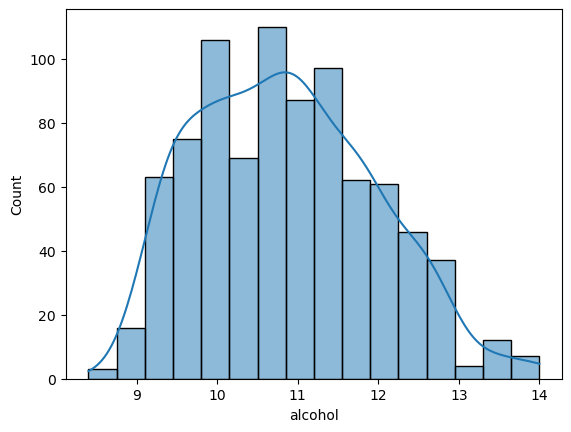

In [16]:
sns.histplot(data=high_quality, x="alcohol", kde=True)

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

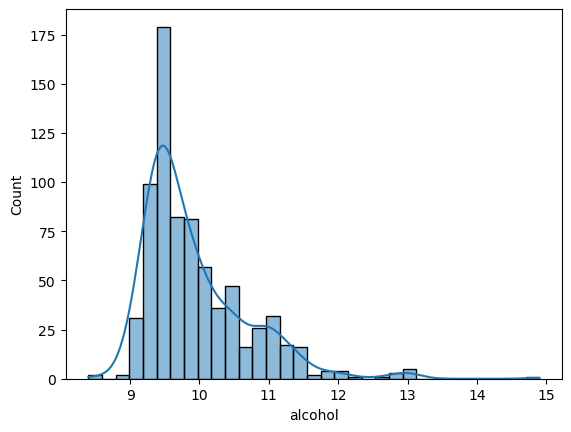

In [17]:
sns.histplot(data=low_quality, x="alcohol", kde=True)

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

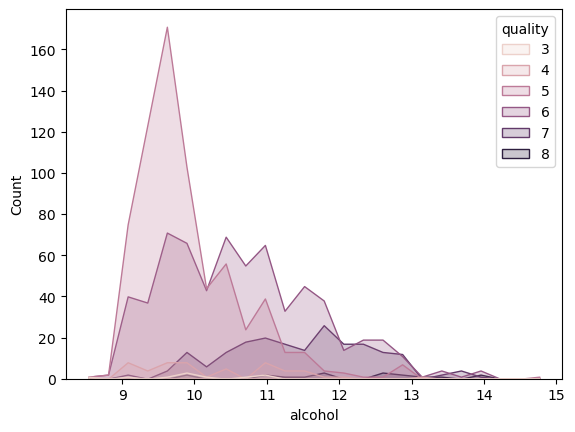

In [18]:
sns.histplot(data=df, x="alcohol", hue = "quality", element="poly")


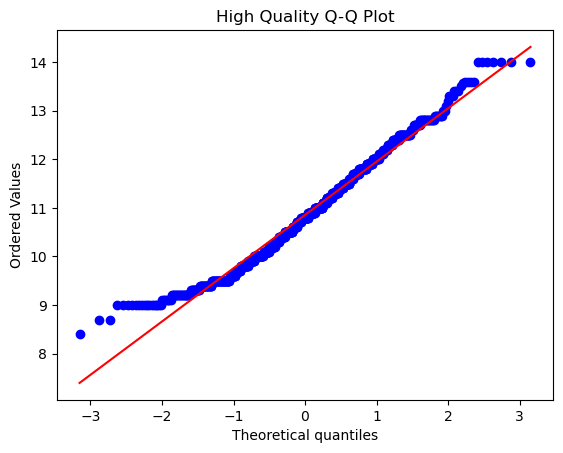

In [19]:
st.probplot(high_quality["alcohol"], dist="norm", plot=plt)
plt.title("High Quality Q-Q Plot")
plt.show()

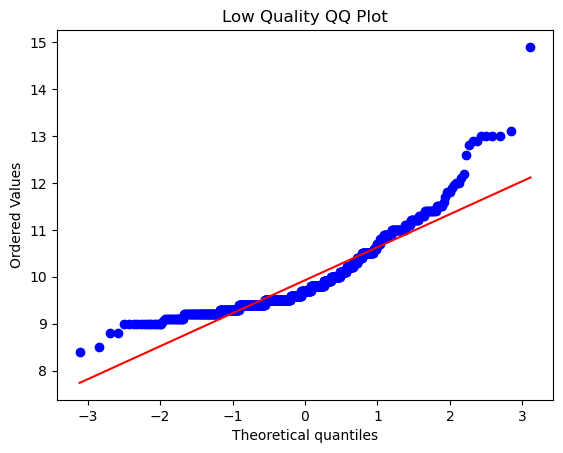

In [20]:
st.probplot(low_quality['alcohol'], dist = 'norm', plot = plt)
plt.title("Low Quality QQ Plot")
plt.show()

The data should be on the red line, there are data points that are far off it, it's an indication that there are some deviations from Normality.
In both the plots, there is deviation from normality 

In [21]:
# shapiro test on high quality

stat, p = st.shapiro(high_quality["alcohol"])

# display the results 
display(stat, p)

0.9786283373832703

7.282434100197577e-10

In [22]:
stat, p = st.shapiro(low_quality["alcohol"])

# display the results 
display(stat, p)

0.8589915633201599

2.869534297814467e-25

In [23]:
# conduct the t-test
stat, p = st.ttest_ind(high_quality["alcohol"], low_quality["alcohol"])

# display the results
display(stat, p)

19.292349918694175

1.0239802386368774e-74

The independent t-test results are significant and therefore we reject the null hypothesis.

# Mann-whitney Test

The tests for assumptions of a t-test have not been satisfied since the variances are not equal, the data is not normal,
the data is not independent and therefore the t-test produces inaccurate results. Therefore, we proceed to perform the Mann-Whitney Test to compare the median for two samples which are not normally distributed.

In [24]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test to compare the median alcohol content of the two samples
stat, p = mannwhitneyu(high_quality, low_quality)

# Display the test statistic and p-value
print('Mann-Whitney U statistic:', stat)
print('p-value:', p)


Mann-Whitney U statistic: [636120. 481313.]
p-value: [1.62383349e-304 2.00605933e-070]


Since the p-value is less than 0.05, we reject the null hypothesis and conclude that the median alcohol content of wines with higher quality ratings is greater than median alcohol content of wines with lower quality ratings.